## Important Libraries

In [529]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [530]:
df = pd.read_csv('/content/loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Cheaking Null Values

In [531]:
df.isnull().sum()
round(100*(df.isnull().sum() / len(df.index)),2)

,0
id,0.0
member_id,0.0
loan_amnt,0.0
funded_amnt,0.0
funded_amnt_inv,0.0
...,...
tax_liens,0.1
tot_hi_cred_lim,100.0
total_bal_ex_mort,100.0
total_bc_limit,100.0


## Cheaking the percentage of null vlaues

In [532]:
null_values_per = round(100*(df.isnull().sum() / len(df.index)),2)
null_values_per[null_values_per > 0]

,0
emp_title,6.19
emp_length,2.71
desc,32.59
title,0.03
mths_since_last_delinq,64.66
...,...
tax_liens,0.10
tot_hi_cred_lim,100.00
total_bal_ex_mort,100.00
total_bc_limit,100.00


## Dropping the columns
### Having percentage more than 30%

In [533]:
# Getting the null values columns where Null % is >30%

null_value_Greater_than_30 = null_values_per[null_values_per > 30]
len(null_value_Greater_than_30)

# There are 58 columns which are having Null values more than 30%

58

## Dropping the column
### Which are having null values more than 30%

In [534]:
dropped_columns = list(null_value_Greater_than_30.index)
df.drop(dropped_columns, axis = 1, inplace = True)

## Cheaking the data after dropping the columns bold text

In [535]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Cheaking the columns which are having null values less rthan 30%

In [536]:
null_values_per_less_than_30 = null_values_per[(null_values_per <= 30) & (null_values_per > 0) ]
len(null_values_per_less_than_30)

# There are 10 columns which are having less than 30% null data.

10

In [537]:
# Removing the rows Which are having null values and the null % is less than 30%

df = df.dropna(subset = null_values_per_less_than_30.index)


In [538]:
# Checking the shape of data to insure that rows which are null dropped

df.shape

(36431, 53)

In [539]:
# Removing the Non wanted columns

df.drop(['id', 'member_id', 'url', 'title', 'zip_code', 'addr_state', 'delinq_2yrs'], axis = 1, inplace = True)


In [540]:
# Checking the data type

df.dtypes

# Check the data type and found that there are some of the columns where data type is wrong.


,0
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,object
int_rate,object
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object


In [541]:
# Converting the Data type of the columns

df['revol_util'] = df['revol_util'].str.replace('%', '').astype('float')
df['int_rate'] = df['int_rate'].str.replace('%', '').astype('float')
df['annual_inc'] = df['annual_inc'].astype('int')

In [542]:
# checking the datatype to make sure data is correct

df.dtypes

,0
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object


## Checking the outliers in  data

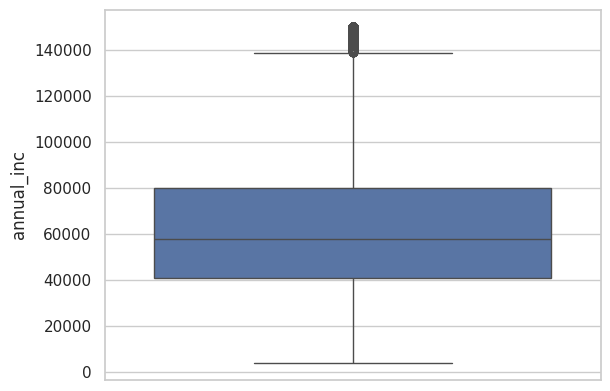

In [543]:
# Checking the outlier in the annual income
# Found some of the outliers in data and now removing them from the data.

Under_2 = df[df['annual_inc']<=150000]

sns.boxplot(Under_2['annual_inc'])
plt.show()

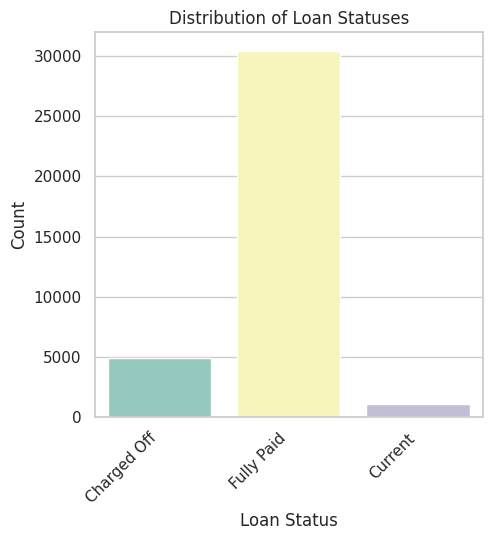

In [544]:
# Here we are plotting the Loan_status Charts
# So that we can see what is the distribution of the data

# Set figure size and background color
plt.figure(figsize=(5, 5))  # Adjust size as needed
plt.rcParams['figure.facecolor'] = '#f2f2f2'  # Adjust hex code for desired shade of gray

# Create the countplot with color customization
sns.countplot(x='loan_status', data=df, palette='Set3')  # Use a built-in color palette

# Customize labels and title
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Statuses')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')


# Display the chart
plt.show()

In [545]:
# Checking the loan status
df['loan_status']

,loan_status
1,Charged Off
3,Fully Paid
4,Current
5,Fully Paid
6,Fully Paid
...,...
39433,Fully Paid
39475,Fully Paid
39551,Fully Paid
39562,Fully Paid


In [546]:
# Filtering only fully paid and charged off
# Convert loan status in to integer type
df['loan_status'] = df['loan_status'].str.replace('Fully Paid', '0')
df['loan_status'] = df['loan_status'].str.replace('Charged Off', '1')
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].astype(int)
df.loan_status.value_counts()

,count
loan_status,
0,30423
1,4942


In [547]:
# Find the mean of the loan status
round(np.mean(df['loan_status']),2)

0.14

## Now  compare the data one by one by loan status

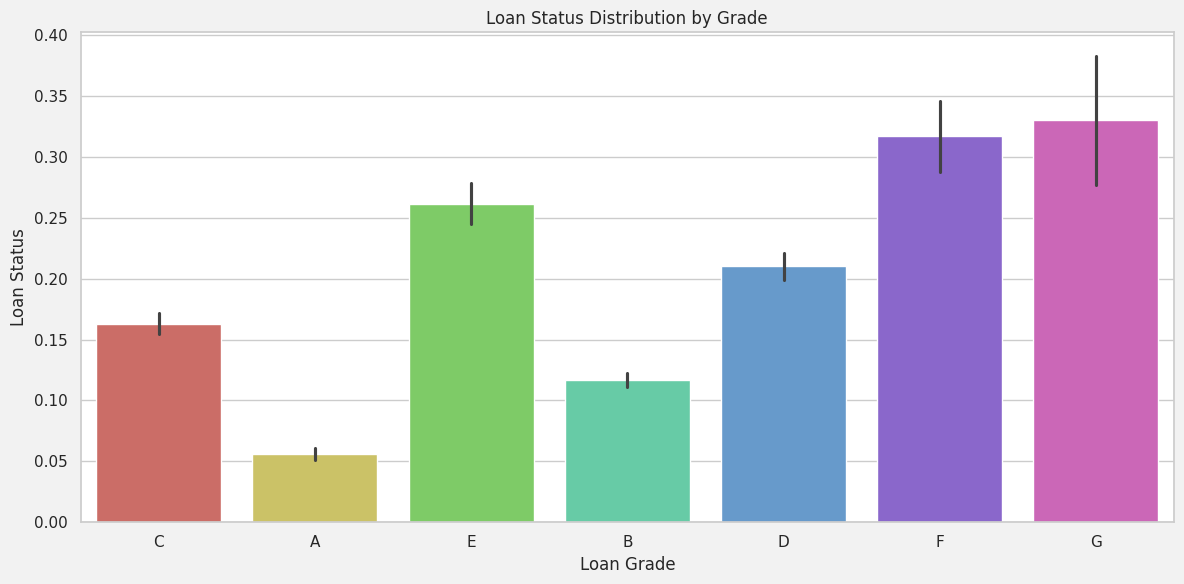

In [548]:
# Compare the loan status with the grade
# Set figure size and background color
plt.figure(figsize=(12, 6))  # Adjust size as needed
plt.rcParams['figure.facecolor'] = '#f2f2f2'  # Adjust hex code for desired shade of gray

# Create the barplot with a color palette
sns.barplot(x='grade', y='loan_status', data=df, palette='hls')  # Use a built-in color palette

# Customize labels and title
plt.xlabel('Loan Grade')
plt.ylabel('Loan Status')
plt.title('Loan Status Distribution by Grade')

# Rotate x-axis labels if needed for readability
# plt.xticks(rotation=45, ha='right')  # Uncomment if needed

# Adjust spacing for clarity
plt.tight_layout()

# Display the chart
plt.show()

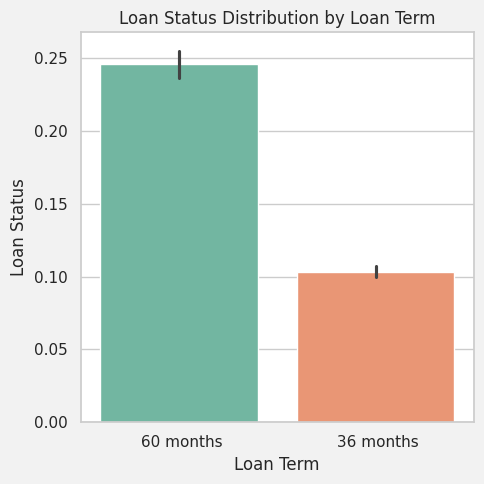

In [549]:
# Set figure size and background color
plt.figure(figsize=(5, 5))
plt.rcParams['figure.facecolor'] = '#f2f2f2'  # Adjust hex code for desired shade of gray

# Create the bar chart with color customization
sns.barplot(x='term', y='loan_status', data=df, palette='Set2')  # Use a built-in color palette

# Customize labels, title, and legend
plt.xlabel('Loan Term')
plt.ylabel('Loan Status')
plt.title('Loan Status Distribution by Loan Term')

# Adjust spacing for clarity
plt.tight_layout()

# Display the chart
plt.show()

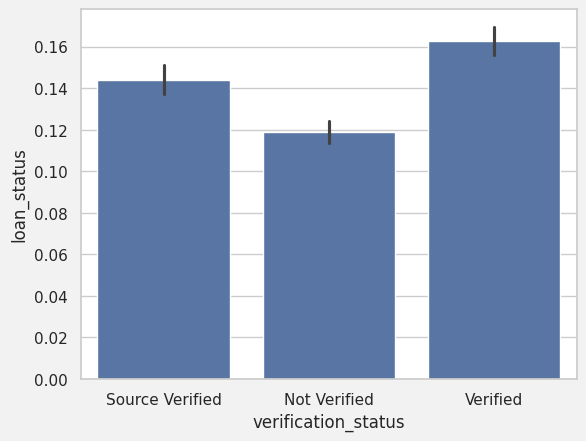

In [550]:
# Compare the loan status with the verification status
sns.barplot(x='verification_status', y='loan_status', data=df)
plt.show()

In [551]:
# Replace month to numbers
df['issue_d'] = df['issue_d'].str.replace('Dec', '12')
df['issue_d'] = df['issue_d'].str.replace('Nov', '11')
df['issue_d'] = df['issue_d'].str.replace('Oct', '10')
df['issue_d'] = df['issue_d'].str.replace('Sep', '9')
df['issue_d'] = df['issue_d'].str.replace('Aug', '8')
df['issue_d'] = df['issue_d'].str.replace('Jul', '7')
df['issue_d'] = df['issue_d'].str.replace('Jun', '6')
df['issue_d'] = df['issue_d'].str.replace('May', '5')
df['issue_d'] = df['issue_d'].str.replace('Apr', '4')
df['issue_d'] = df['issue_d'].str.replace('Mar', '3')
df['issue_d'] = df['issue_d'].str.replace('Feb', '2')
df['issue_d'] = df['issue_d'].str.replace('Jan', '1')

In [552]:
# Convert the 'issue_d' to a datetime object using the custom format 'mm-yy'
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%m-%y')

In [553]:
# Extract the year and month into new columns
df['year'] = df['issue_d'].dt.year
df['month'] = df['issue_d'].dt.month

In [554]:
# Display the result
print(df[['issue_d', 'year', 'month']])

         issue_d  year  month
1     2011-12-01  2011     12
3     2011-12-01  2011     12
5     2011-12-01  2011     12
6     2011-12-01  2011     12
7     2011-12-01  2011     12
...          ...   ...    ...
39433 2008-01-01  2008      1
39475 2007-12-01  2007     12
39551 2007-12-01  2007     12
39562 2007-11-01  2007     11
39623 2007-10-01  2007     10

[35365 rows x 3 columns]


In [555]:
# let's first observe the number of loans granted across years
df.groupby('year').year.count()

,year
year,
2007,4
2008,1053
2009,4423
2010,10795
2011,19090


In [556]:
# number of loans across months
df.groupby('month').month.count()

,month
month,
1,2048
2,2020
3,2395
4,2669
5,2745
6,2977
7,3115
8,3186
9,3276


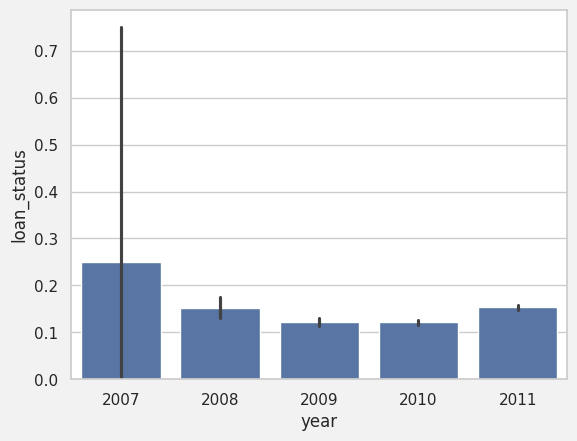

In [557]:
# Compare the loan status with the year
sns.barplot(x='year', y='loan_status', data=df)
plt.show()

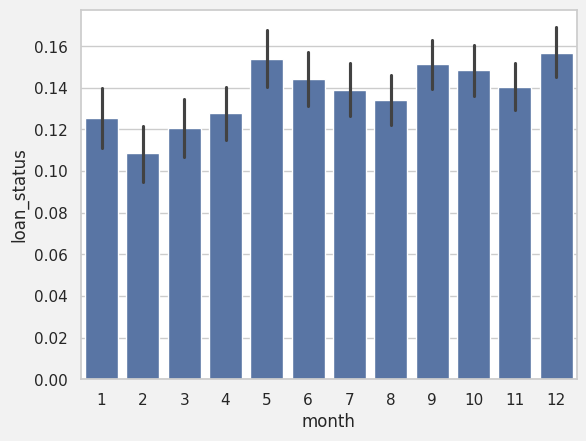

In [558]:
# Compare the loan status with the month
sns.barplot(x='month', y='loan_status', data=df)
plt.show()

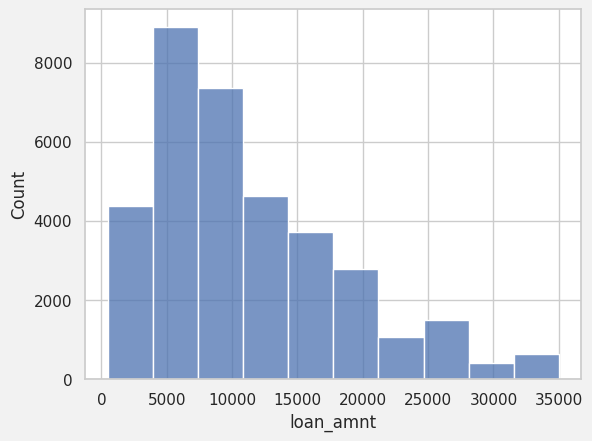

In [559]:
# Maximum loan amount is rely on 5000 to 1000
sns.histplot(df["loan_amnt"], bins = 10)
plt.show()

In [560]:
# Lets bin the loan amount ion Low, Medium, High, Very high.
def bin_loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 10000:
        return 'medium'
    elif n >= 10000 and n < 20000:
        return 'high'
    else:
        return 'very high'

df['loan_amnt'] = df['loan_amnt'].apply(lambda x: bin_loan_amount(x))

In [561]:
df['loan_amnt'].value_counts()

,count
loan_amnt,
high,12415
medium,10982
low,6610
very high,5358


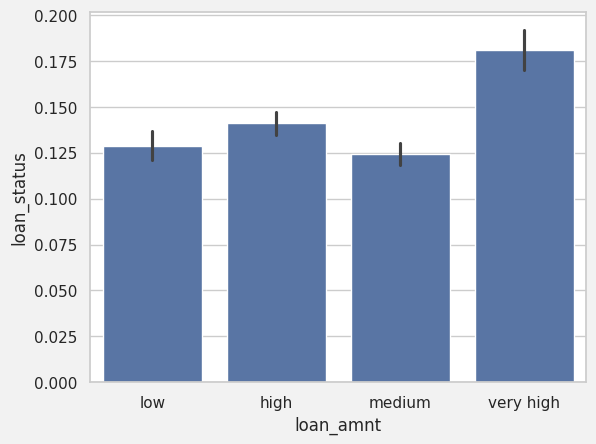

In [562]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
sns.barplot(x='loan_amnt', y='loan_status', data=df)
plt.show()

In [563]:
# let's also convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: bin_loan_amount(x))

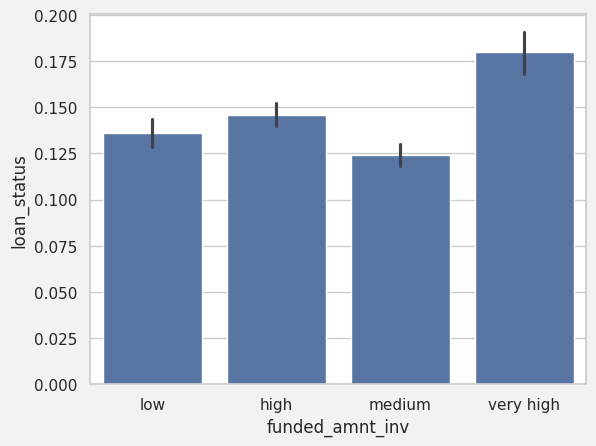

In [564]:
# funded amount invested
sns.barplot(x='funded_amnt_inv', y='loan_status', data=df)
plt.show()

In [565]:
# lets also convert interest rate to low, medium, high, very high
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    elif n >15 and n <=25:
        return 'high'
    else:
        return 'very high'

df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

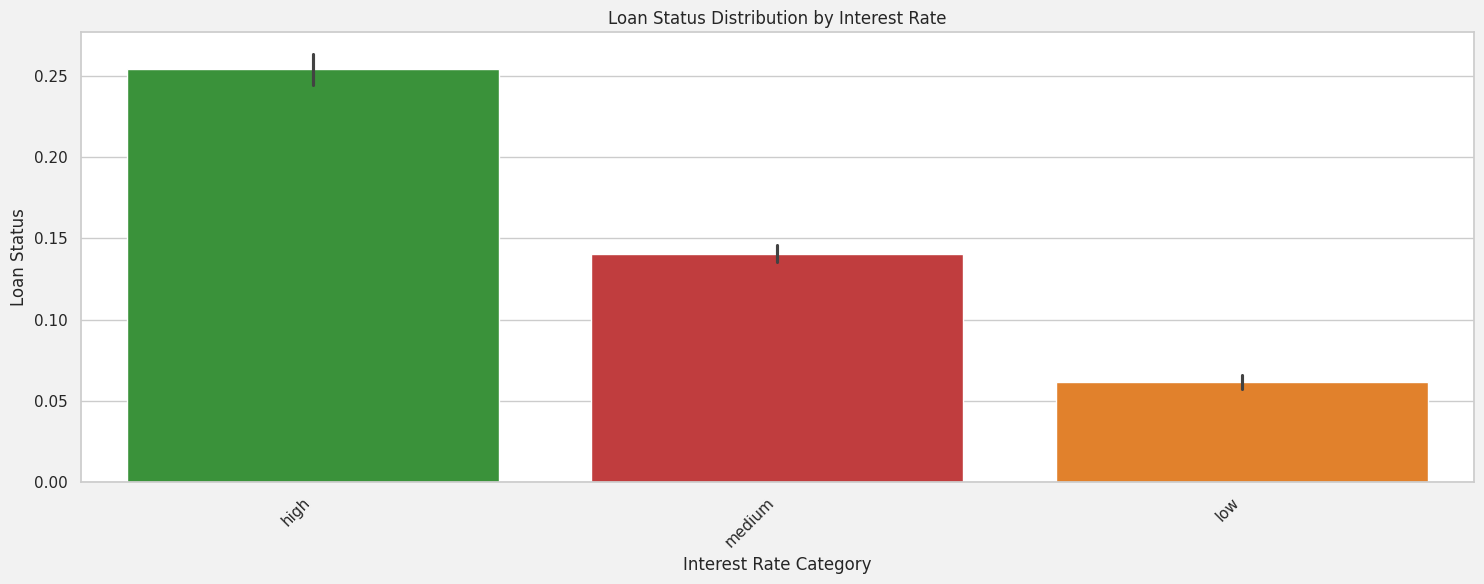

In [566]:
# comparing default rates across rates of interest
# Set figure size and background color
plt.figure(figsize=(15, 6))  # Adjust size as needed
plt.rcParams['figure.facecolor'] = '#f2f2f2'  # Adjust hex code for desired shade of gray

# Define a color palette with good contrast and visual appeal
colors = ['#2ca02c', '#d62728', '#ff7f0e']  # Green, Red, Orange

# Create the barplot with custom colors
sns.barplot(x='int_rate', y='loan_status', data=df, palette=colors)

# Customize labels and title
plt.xlabel('Interest Rate Category')
plt.ylabel('Loan Status')
plt.title('Loan Status Distribution by Interest Rate')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust spacing for clarity
plt.tight_layout()

# Display the chart
plt.show()

In [567]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'


df['dti'] = df['dti'].apply(lambda x: dti(x))

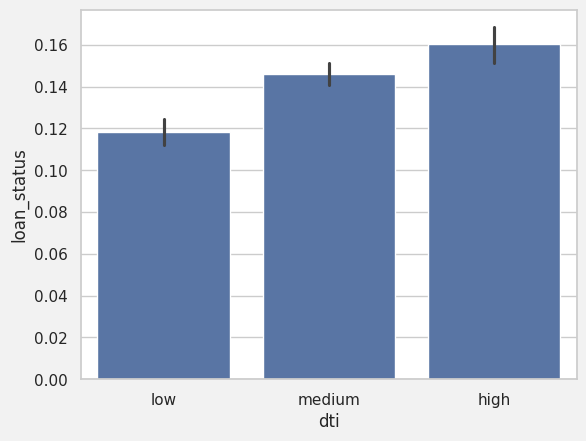

In [568]:
# comparing default rates across debt to income ratio
sns.barplot(x='dti', y='loan_status', data=df)
plt.show()

In [569]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'

df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

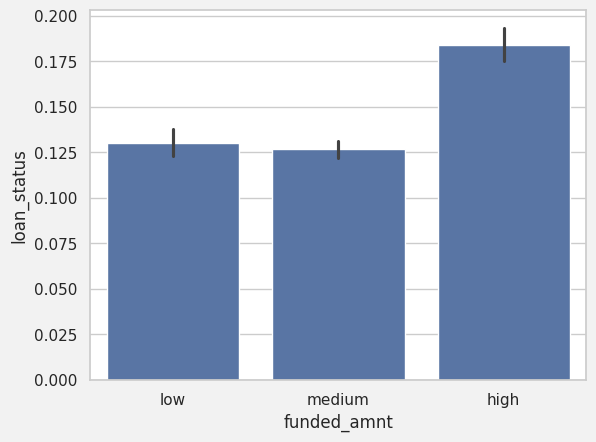

In [570]:
sns.barplot(x='funded_amnt', y='loan_status', data=df)
plt.show()

In [571]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'

df['installment'] = df['installment'].apply(lambda x: installment(x))

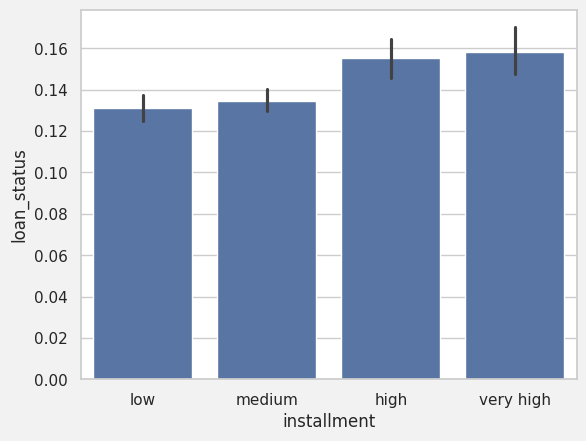

In [572]:
# comparing default rates across installment
sns.barplot(x='installment', y='loan_status', data=df)
plt.show()

In [573]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

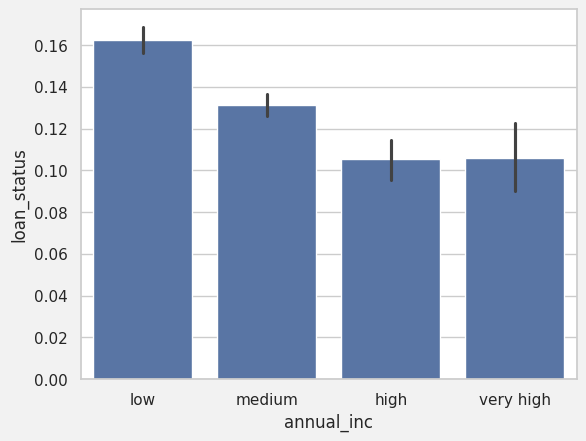

In [574]:
# annual income and default rate
sns.barplot(x='annual_inc', y='loan_status', data=df)
plt.show()

## Segmented Univariate Analysis
#### We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

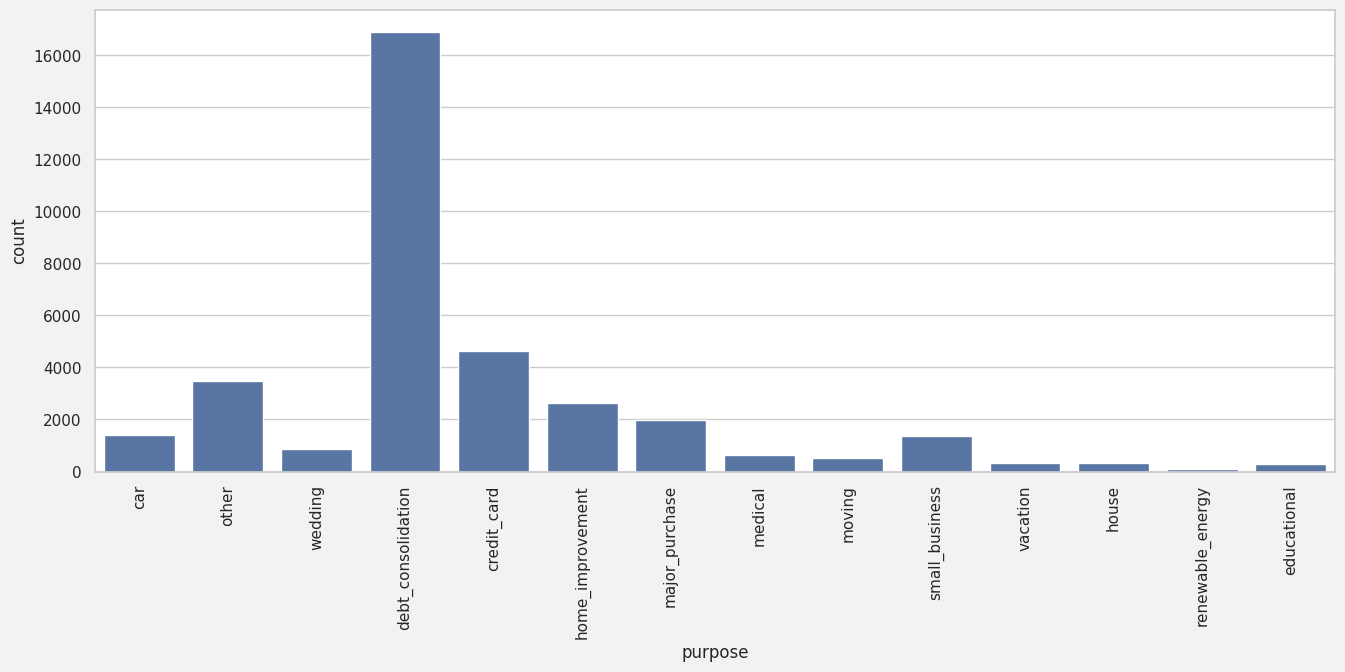

In [575]:
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=df)
plt.xticks(rotation=90)
plt.show()

In [576]:
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,16909
credit_card,4626
home_improvement,2614
major_purchase,1973


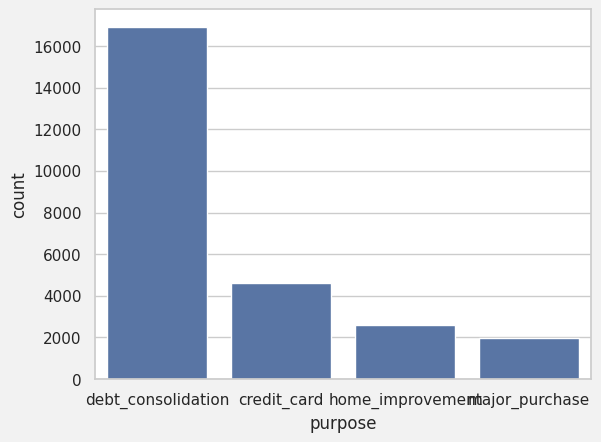

In [577]:
# plotting number of loans by purpose
sns.countplot(x=df['purpose'])
plt.show()

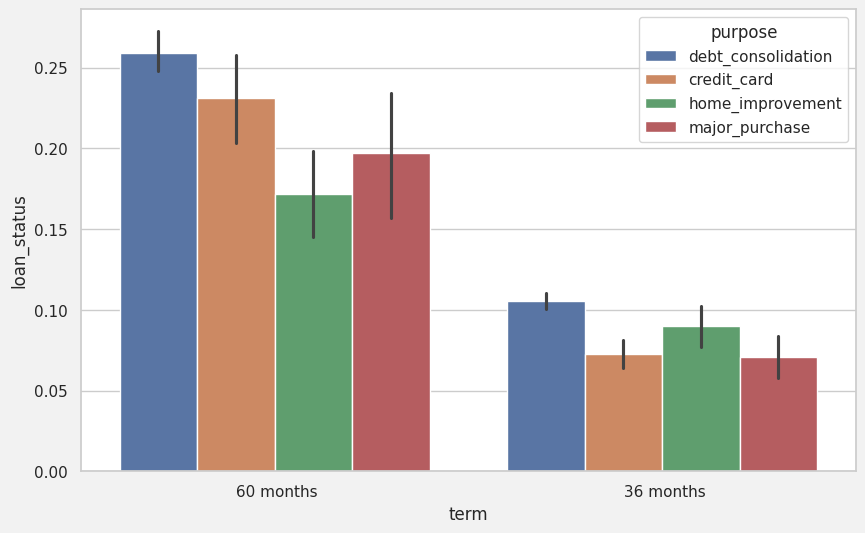

In [578]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

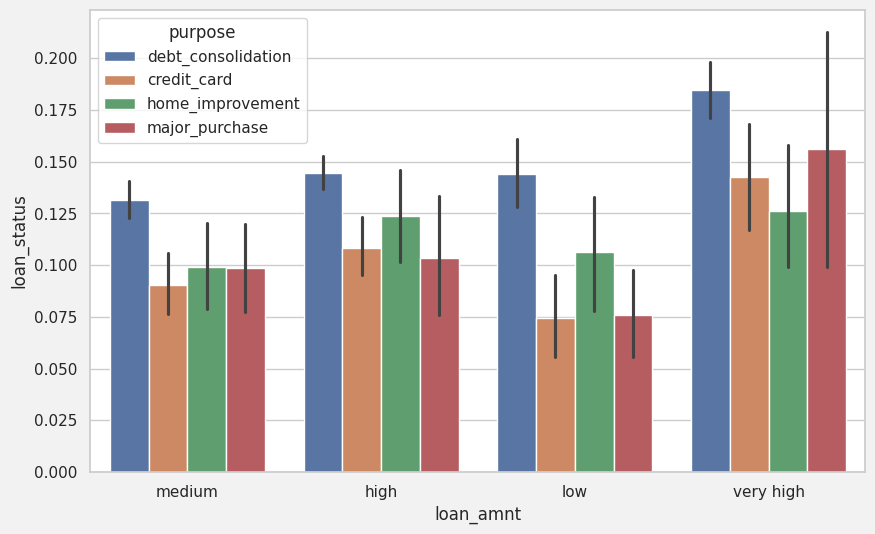

In [579]:
# loan_amnt: same trend across loan purposes
plt.figure(figsize=[10, 6])
sns.barplot(x='loan_amnt', y="loan_status", hue='purpose', data=df)
plt.show()

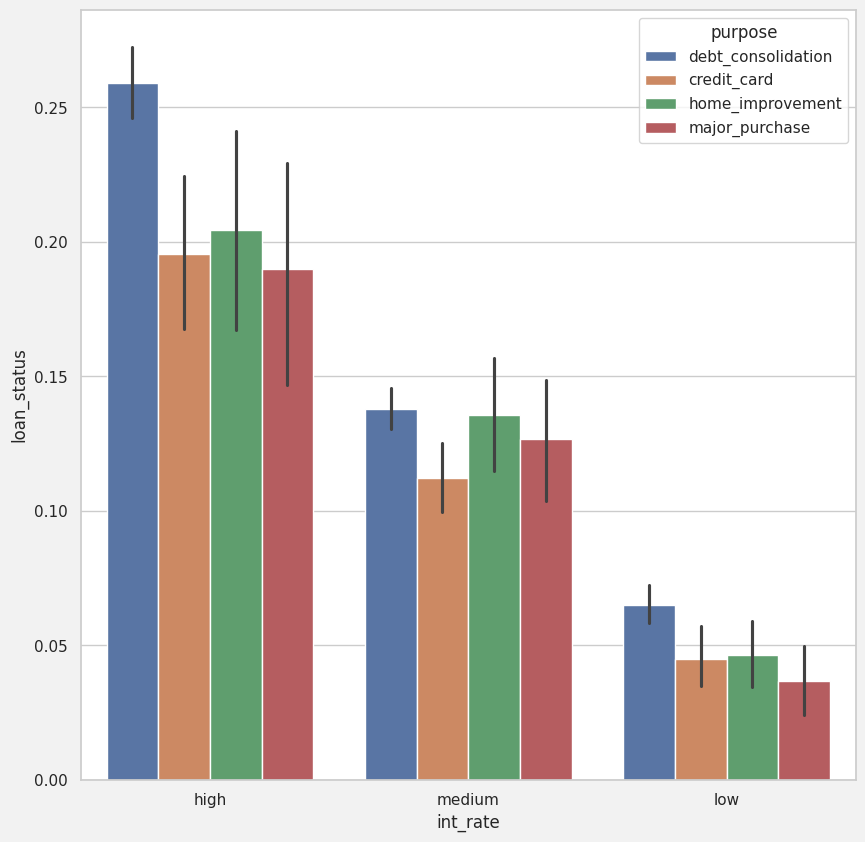

In [586]:
# intrest rate
plt.figure(figsize=[10, 10])
sns.barplot(x='int_rate', y="loan_status", hue='purpose', data=df)
plt.show()

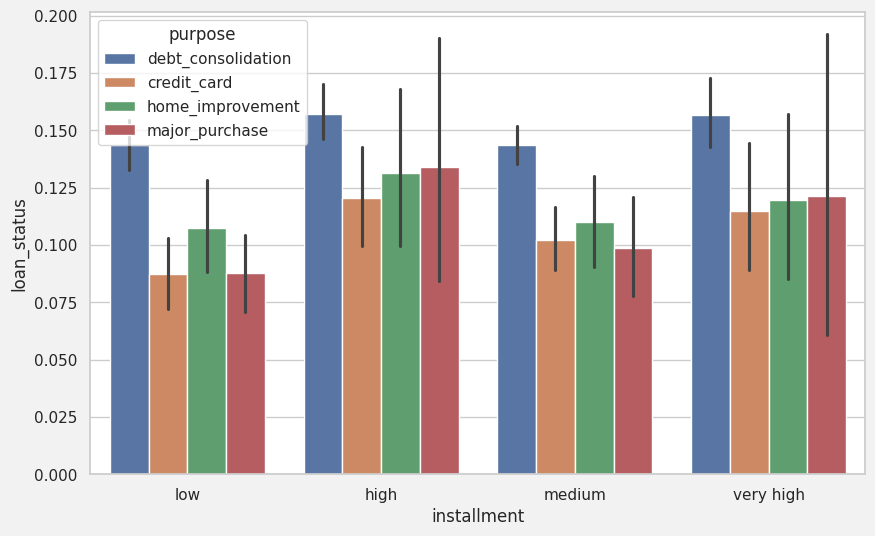

In [581]:
# inatallment
plt.figure(figsize=[10, 6])
sns.barplot(x='installment', y="loan_status", hue='purpose', data=df)
plt.show()

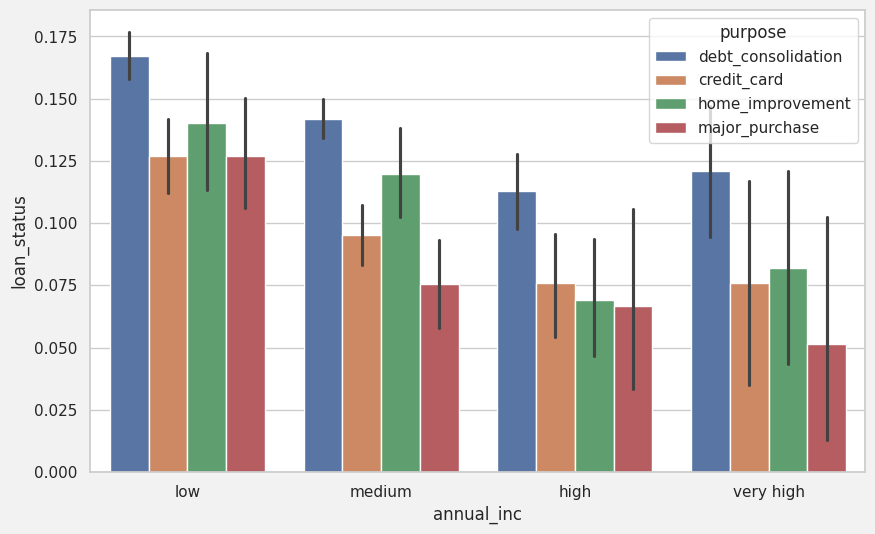

In [582]:
# annual income
plt.figure(figsize=[10, 6])
sns.barplot(x='annual_inc', y="loan_status", hue='purpose', data=df)
plt.show()

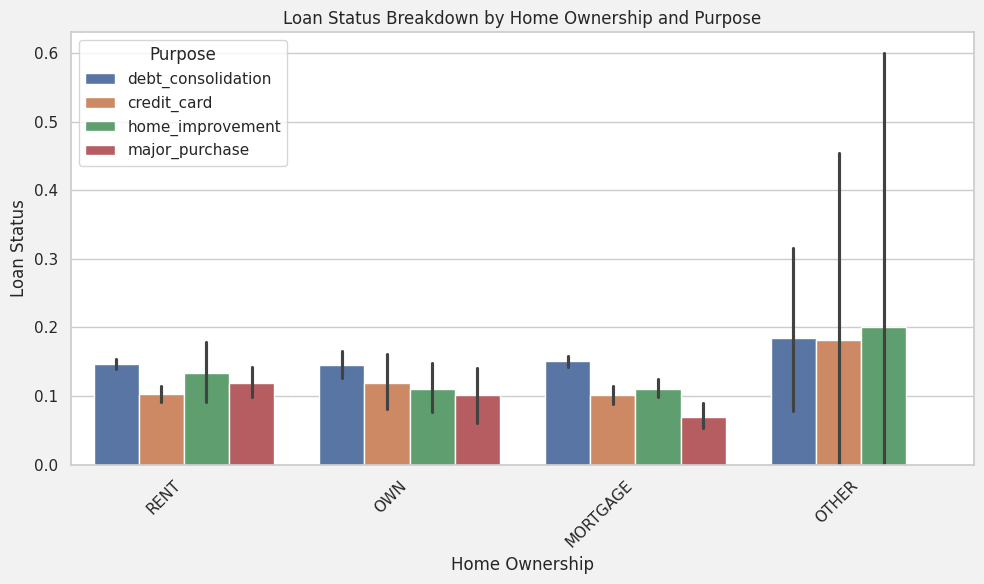

In [583]:
# home ownership
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='home_ownership', y="loan_status", hue='purpose', data=df)
plt.xlabel('Home Ownership')
plt.ylabel('Loan Status')
plt.title('Loan Status Breakdown by Home Ownership and Purpose')
plt.legend(title='Purpose')  # Add legend title for clarity
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Set the background color to a light gray
plt.rcParams['figure.facecolor'] = '#f2f2f2'  # Adjust hex code for desired shade

plt.tight_layout()  # Adjust spacing for clarity
plt.show()

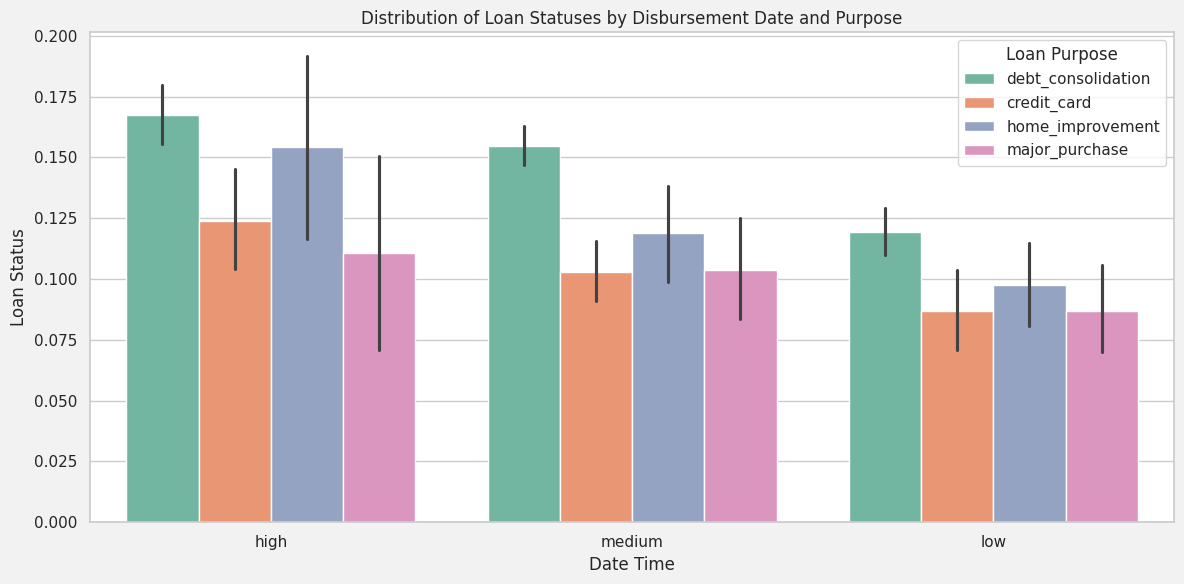

In [587]:
# dti
# Set figure size and background color (optional)
plt.figure(figsize=(12, 6))  # Adjust size as needed
plt.rcParams['figure.facecolor'] = '#f2f2f2'  # Adjust hex code for desired shade of gray

# Create the barplot with informative labels and title
sns.barplot(x='dti', y="loan_status", hue='purpose', data=df, palette='Set2')
plt.xlabel('Date Time')  # Adjust label based on 'dti' format (e.g., 'Loan Disbursement Date')
plt.ylabel('Loan Status')
plt.title('Distribution of Loan Statuses by Disbursement Date and Purpose')

# Adjust spacing for clarity
plt.tight_layout()

# Rotate x-axis labels if needed (for many bars)
if len(df['dti'].unique()) > 10:  # Adjust threshold for rotation
    plt.xticks(rotation=45, ha='right')

# Display the chart with a legend
plt.legend(title='Loan Purpose', loc='upper right')  # Adjust legend position if needed

plt.show()

# Observation
● Lending club should reduce the high interest loans for 60 months tenure, they are prone to loan
default.

● Grades are good way to defecting defaulters, but lenders should examine more information about the customers before issue the loan ( G to A).

● Before issue the loan lender should be focus on high installment and high annual income , because of high installment and high annual income. These criteria prone to loan default.

● debt consolidation loans are defaulted more. Lending club should stop/reduce issuing the loans to
them.

● Borrowers with mortgage home ownership are taking higher loans and defaulting the approved
loans. Lending club should stop giving loans to this category.
